Top 5 Features based on SelectKBest:
                                  Score
vehicle_condition_score    31896.867474
customer_engagement_score  31165.542267
incentive_received         16162.896062
trade_in_history           15933.154427
engagement_to_age_ratio     7267.536712

Classification Report (Using Top Features):
              precision    recall  f1-score   support

           0       0.92      0.94      0.93     28789
           1       0.84      0.80      0.82     11211

    accuracy                           0.90     40000
   macro avg       0.88      0.87      0.88     40000
weighted avg       0.90      0.90      0.90     40000


Confusion Matrix:
[[27090  1699]
 [ 2234  8977]]


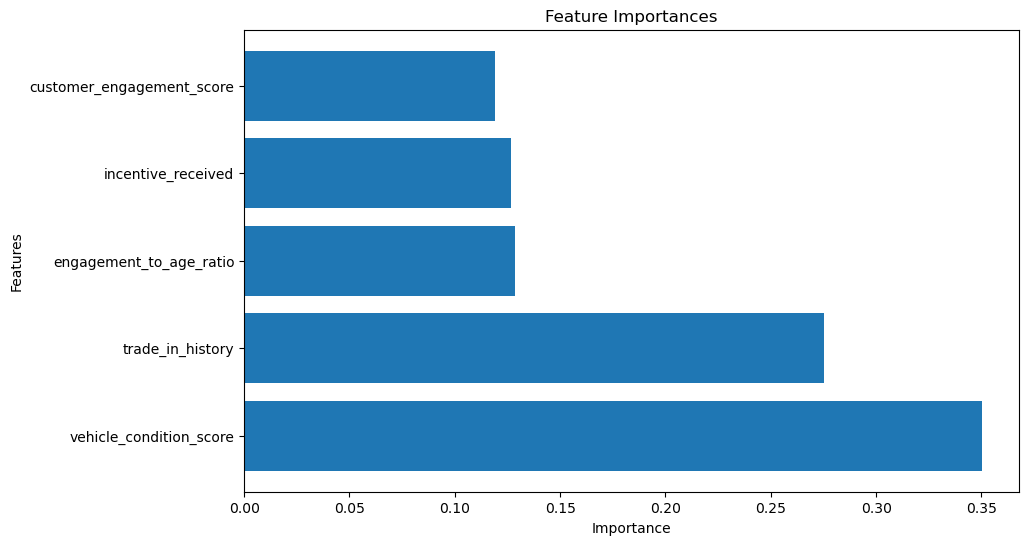


Top Features Based on Feature Importances from Random Forest:
                           Importance
vehicle_condition_score      0.350369
trade_in_history             0.275433
engagement_to_age_ratio      0.128494
incentive_received           0.126458
customer_engagement_score    0.119245


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Step 1: Load your CSV data
# Assuming your CSV file is named 'vehicle_data.csv'
df = pd.read_csv('exchange_dataset_enhanced.csv')

# Step 2: Feature selection using SelectKBest (f-classif) for classification tasks
X = df.drop('exchange', axis=1)  # Features
y = df['exchange']  # Target variable

# Use SelectKBest to select top 5 features based on ANOVA F-test
selector = SelectKBest(score_func=f_classif, k=5)  # Select top 5 features
X_new = selector.fit_transform(X, y)

# Get the feature scores and print the top 5 features
feature_scores = pd.DataFrame(selector.scores_, index=X.columns, columns=["Score"])
top_features = feature_scores.nlargest(5, 'Score')  # Top 5 features by score
print("Top 5 Features based on SelectKBest:")
print(top_features)

# Step 3: Train the model using only the top features from SelectKBest
X_new_df = pd.DataFrame(X_new, columns=top_features.index)
X_train, X_test, y_train, y_test = train_test_split(X_new_df, y, test_size=0.2, random_state=42)

# Train Random Forest model on the top features
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Step 4: Evaluate model on test set
y_pred = rf_model.predict(X_test)
print("\nClassification Report (Using Top Features):")
print(classification_report(y_test, y_pred))

# Step 5: Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

# Step 6: Feature Importance using RandomForestClassifier
# RandomForest model provides feature importance which helps to see the most important features
importances = rf_model.feature_importances_
feature_importance = pd.DataFrame(importances, index=X_new_df.columns, columns=["Importance"])
sorted_importance = feature_importance.sort_values(by="Importance", ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.barh(sorted_importance.index, sorted_importance["Importance"])
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()

# Step 7: Visualize the most important features in model
# Here we can print the most important features based on random forest model
print("\nTop Features Based on Feature Importances from Random Forest:")
print(sorted_importance)
